# Install

In [1]:
!pip install rouge rouge-score evaluate transformers bert-score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   

# BLEU

## [nltk](https://wikidocs.net/31695)

In [2]:
import nltk.translate.bleu_score as bleu

# 정답
candidate = 'It is a guide to action which ensures that the military always obeys the commands of the party'
# 생성된 문장
references = [
    'It is a guide to action that ensures that the military will forever heed Party commands',
    'It is the guiding principle which guarantees the military forces always being under the command of the Party',
    'It is the practical guide for the army always to heed the directions of the party'
]

print('패키지 NLTK의 BLEU :',bleu.sentence_bleu(list(map(lambda ref: ref.split(), references)),candidate.split()))

패키지 NLTK의 BLEU : 0.5045666840058485


In [4]:
from nltk.translate.bleu_score import sentence_bleu

# Define your desired weights (example: higher weight for bi-grams)
weights = (0.25, 0.25, 0, 0)  # Weights for uni-gram, bi-gram, tri-gram, and 4-gram

# Reference and predicted texts (same as before)
reference = [["the", "picture", "is", "clicked", "by", "me"],
             ["this", "picture", "was", "clicked", "by", "me"]]
predictions = ["the", "picture", "the", "picture", "by", "me"]

# Calculate BLEU score with weights
score = sentence_bleu(reference, predictions, weights=weights);
print(score)

0.7186082239261684


## [hugging face’s evaluate](https://huggingface.co/spaces/evaluate-metric/bleu)

In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
import evaluate # 허깅페이스 라이브러리
from nltk.tokenize import word_tokenize


bleu = evaluate.load("bleu")

predictions = ["hello there general kenobi", "foo bar foobar"]
references = [
     ["hello there general kenobi", "hello there !"],
     ["foo bar foobar"]
]
results = bleu.compute(predictions=predictions, references=references
                       , tokenizer=word_tokenize)
print(results)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


{'bleu': 1.0, 'precisions': [1.0, 1.0, 1.0, 1.0], 'brevity_penalty': 1.0, 'length_ratio': 1.1666666666666667, 'translation_length': 7, 'reference_length': 6}


# ROUGE

## [rouge](https://velog.io/@crosstar1228/NLPRouge-score-Summarization%EC%9D%98-%ED%8F%89%EA%B0%80-Metric)

In [7]:
from rouge import Rouge

model_out = ["he began by starting a five person war cabinet and included chamberlain as lord president of the council",
             "the siege lasted from 250 to 241 bc, the romans laid siege to lilybaeum",
             "the original ocean water was found in aquaculture"]

reference = ["he began his premiership by forming a five-man war cabinet which included chamberlain as lord president of the council",
             "the siege of lilybaeum lasted from 250 to 241 bc, as the roman army laid siege to the carthaginian-held sicilian city of lilybaeum",
             "the original mission was for research into the uses of deep ocean water in ocean thermal energy conversion (otec) renewable energy production and in aquaculture"]
rouge = Rouge()
rouge.get_scores(model_out, reference, avg=True)

{'rouge-1': {'r': 0.5528035775713794,
  'p': 0.8539562289562289,
  'f': 0.6512670259900423},
 'rouge-2': {'r': 0.3353174603174603,
  'p': 0.5244559362206421,
  'f': 0.3928074411537155},
 'rouge-l': {'r': 0.5369305616983636,
  'p': 0.8122895622895623,
  'f': 0.6282785202429159}}

## [rouge_score](https://dev.to/aws-builders/mastering-rouge-matrix-your-guide-to-large-language-model-evaluation-for-summarization-with-examples-jjg)

In [8]:
# Import the rouge_scorer function from rouge_score
from rouge_score import rouge_scorer

# Initialize the scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'])

# Compute the Rouge scores for reference and candidate.
scores = scorer.score('The quick brown fox jumps over the lazy dog',
                      'The quick brown dog jumps on the log.')

# Print the scores
print(scores)

{'rouge1': Score(precision=0.75, recall=0.6666666666666666, fmeasure=0.7058823529411765), 'rouge2': Score(precision=0.2857142857142857, recall=0.25, fmeasure=0.26666666666666666), 'rougeL': Score(precision=0.625, recall=0.5555555555555556, fmeasure=0.5882352941176471), 'rougeLsum': Score(precision=0.625, recall=0.5555555555555556, fmeasure=0.5882352941176471)}


## [hugging face’s evaluate](https://huggingface.co/spaces/evaluate-metric/rouge)

In [9]:
import evaluate
from nltk.tokenize import word_tokenize

rouge = evaluate.load('rouge')
predictions = ["hello there", "general kenobi"]
references = ["hello there", "general kenobi"]

results = rouge.compute(predictions=predictions,
                        references=references,
                        rouge_types=['rouge1', 'rouge2', 'rougeL', 'rougeLsum'],
                        tokenizer=word_tokenize)
print(results)

{'rouge1': np.float64(1.0), 'rouge2': np.float64(1.0), 'rougeL': np.float64(1.0), 'rougeLsum': np.float64(1.0)}


# METEOR

## [nltk](https://www.nltk.org/howto/meteor.html#meteor-tests)

In [10]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
from nltk.translate import meteor
from nltk import word_tokenize

In [12]:
references = [word_tokenize('create or update a vm set')]
candidate = word_tokenize('creates or updates a virtual machine scale set')

round(meteor(references, candidate), 4)

0.7806

In [13]:
from nltk.translate.meteor_score import meteor_score
from nltk.tokenize import word_tokenize

# Define candidate and reference sentences
candidate = "The quick brown fox jumps over the lazy dog"
reference = "A fast brown fox leaps over a lazy dog"

# Calculate METEOR score
score = meteor_score([word_tokenize(reference)], word_tokenize(candidate))

# Print the result
print(f"METEOR Score: {score:.4f}")

METEOR Score: 0.7687


## [hugging face’s evaluate](https://huggingface.co/spaces/evaluate-metric/meteor)

In [14]:
import evaluate

meteor = evaluate.load('meteor')

predictions = ["It is a guide to action which ensures that the military always obeys the commands of the party"]
references = ["It is a guide to action that ensures that the military will forever heed Party commands"]

results = meteor.compute(predictions=predictions, references=references)
results

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


{'meteor': np.float64(0.6944444444444445)}

# BERTscore

## [bert_score](https://github.com/Tiiiger/bert_score/blob/master/example/Demo.ipynb)

In [15]:
from bert_score import BERTScorer

# Example texts
reference = "This is a reference text example."
candidate = "This is a candidate text example."
# BERTScore calculation
scorer = BERTScorer(model_type='bert-base-uncased')
P, R, F1 = scorer.score([candidate], [reference])
print(f"BERTScore Precision: {P.mean():.4f}, Recall: {R.mean():.4f}, F1: {F1.mean():.4f}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERTScore Precision: 0.9258, Recall: 0.9258, F1: 0.9258


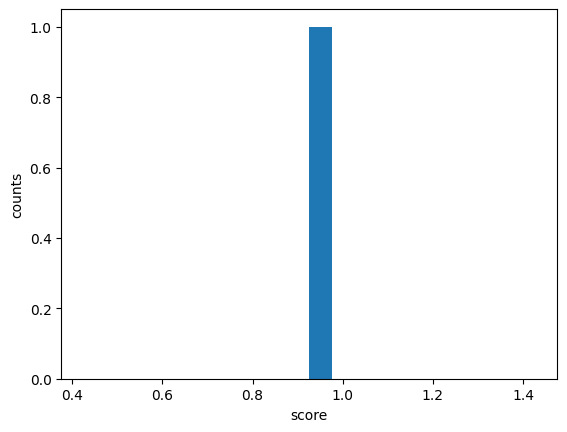

In [16]:
import matplotlib.pyplot as plt

plt.hist(F1, bins=20)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


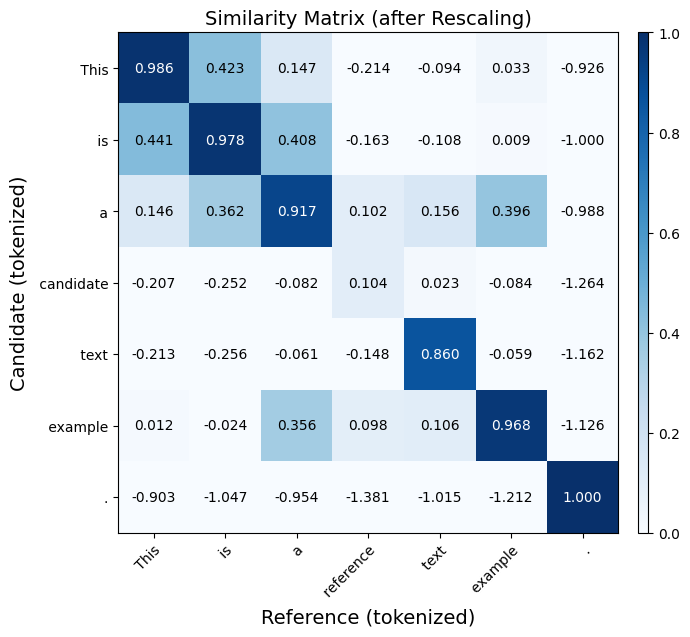

In [17]:
from bert_score import plot_example

plot_example(candidate, reference, lang="en", rescale_with_baseline=True)

## [transformers](https://haticeozbolat17.medium.com/text-summarization-how-to-calculate-bertscore-771a51022964)

In [18]:
# Step 1: Import the required libraries
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Step 2: Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Step 3: Define the two texts to compare
text1 = "This is an example text."
text2 = "This text contains an example sentence."

# Step 4: Prepare the texts for BERT
inputs1 = tokenizer(text1, return_tensors="pt", padding=True, truncation=True)
inputs2 = tokenizer(text2, return_tensors="pt", padding=True, truncation=True)

# Step 5: Feed the texts to the BERT model
outputs1 = model(**inputs1)
outputs2 = model(**inputs2)

# Step 6: Obtain the representation vectors
embeddings1 = outputs1.last_hidden_state.mean(dim=1).detach().numpy()
embeddings2 = outputs2.last_hidden_state.mean(dim=1).detach().numpy()

# Step 7: Calculate cosine similarity
similarity = np.dot(embeddings1, embeddings2.T) / (np.linalg.norm(embeddings1) * np.linalg.norm(embeddings2))

# Step 8: Print the result
print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

### Output: Similarity between the texts: 0.9000


Similarity between the texts: 0.9000


## [hugging face’s evaluate](https://huggingface.co/spaces/evaluate-metric/bertscore)

In [19]:
from evaluate import load

bertscore = load("bertscore")

predictions = ["hello world", "general kenobi"]
references = ["goodnight moon", "the sun is shining"]

results = bertscore.compute(predictions=predictions, references=references
                            , model_type="distilbert-base-uncased")
print(results)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

{'precision': [0.7899678349494934, 0.5584040880203247], 'recall': [0.7899678349494934, 0.5889029502868652], 'f1': [0.7899678349494934, 0.5732481479644775], 'hashcode': 'distilbert-base-uncased_L5_no-idf_version=0.3.12(hug_trans=4.50.2)'}


# SemScore

## [sentence_transformers](https://www.newscatcherapi.com/blog/ultimate-guide-to-text-similarity-with-python)

In [20]:
from sentence_transformers import SentenceTransformer, util
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

model = SentenceTransformer("all-mpnet-base-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [21]:
raw_sentences = ["The bottle is empty",
"There is nothing in the bottle"]
sentences = [sent.lower().split(" ") for sent in raw_sentences]

In [22]:
embeddings = model.encode(sentences, convert_to_tensor=True)

similarity = []
for i in range(len(sentences)):
  row = []
  for j in range(len(sentences)):
    row.append(util.pytorch_cos_sim(embeddings[i], embeddings[j]).item())
  similarity.append(row)

In [23]:
import pandas as pd
import seaborn as sns

labels = [sentence for sentence in raw_sentences]

def create_heatmap(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity)
  df.columns = labels
  df.index = labels
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(df, cmap=cmap)

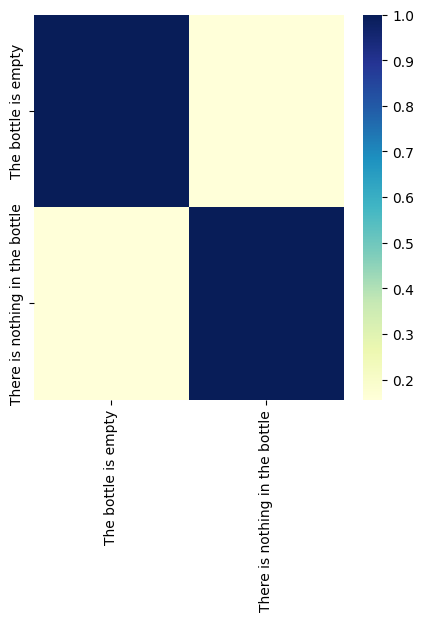

In [24]:
create_heatmap(similarity)